In [1]:
%run C:\Users\HSS\dd.py

In [2]:
import os
cwd = os.getcwd()


In [3]:
cwd

'C:\\Users\\HSS\\Documents\\dev\\Lets-EDA'

In [4]:
import time
start = time.time()
train = pd.read_csv(cwd+'/input/train.csv')
end = time.time()
print(end-start)

In [8]:
data = train.copy()

In [9]:
data.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


- `groupId` - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- `matchId` - Integer ID to identify match. There are no matches that are in both the training and testing set.
- `assists` - Number of enemy players this player damaged that were killed by teammates.
- `boosts` - Number of boost items used.
- `damageDealt` - Total damage dealt. Note: Self inflicted damage is subtracted.
- `DBNOs` - Number of enemy players knocked.
- `headshotKills` - Number of enemy players killed with headshots.
- `heals` - Number of healing items used.
- `killPlace` - Ranking in match of number of enemy players killed.
- `killPoints` - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
- `kills` - Number of enemy players killed.
- `killStreaks` - Max number of enemy players killed in a short amount of time.
- `longestKill` - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
- `maxPlace` - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- `numGroups` - Number of groups we have data for in the match.
- `revives` - Number of times this player revived teammates.
- `rideDistance` - Total distance traveled in vehicles measured in meters.
- `roadKills` - Number of kills while in a vehicle.
- `swimDistance` - Total distance traveled by swimming measured in meters.
- `teamKills` - Number of times this player killed a teammate.
- `vehicleDestroys` - Number of vehicles destroyed.
- `walkDistance` - Total distance traveled on foot measured in meters.
- `weaponsAcquired` - Number of weapons picked up.
- `winPoints` - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
- `winPlacePerc` - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## 1. The killers

- 일단 print도 굉장히 많이 사용되고, .format의 활용법을 알아놔야할 듯

In [21]:
print('플레이어들은 평균 {:.4f} 킬을 기록했고, 99%의 플레이들은 {} 킬 이하를, 가장 킬을 많이한 여포는 무려 {}명의 뚝배기를 부쉈다...'
     .format(data['kills'].mean(), data['kills'].quantile(0.99), data['kills'].max()))

플레이어들은 평균 0.9248 킬을 기록했고, 99%의 플레이들은 7.0 킬 이하를, 가장 킬을 많이한 여포는 무려 72명의 뚝배기를 부쉈다...


In [22]:
print(data['kills'].sort_values())

0           0
2557157     0
2557159     0
2557161     0
2557162     0
2557163     0
2557165     0
2557167     0
2557169     0
2557171     0
2557155     0
2557173     0
2557175     0
2557176     0
2557179     0
2557180     0
2557181     0
2557182     0
2557183     0
2557185     0
2557186     0
2557174     0
2557154     0
2557153     0
2557152     0
2557113     0
2557115     0
2557116     0
2557117     0
2557118     0
           ..
2575145    41
2040545    41
160254     42
781794     42
1744705    42
3702869    43
2105633    43
1702541    43
917841     44
3206834    44
2724641    45
2861704    46
3730946    46
2215801    47
156599     48
2914453    49
1454065    50
1462706    53
2601666    53
2020831    53
2929506    53
770454     55
3673965    55
797111     56
1491277    56
4273754    57
672993     57
334400     65
1248348    66
3431247    72
Name: kills, Length: 4446966, dtype: int64


In [27]:
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

TypeError: unorderable types: str() < int()

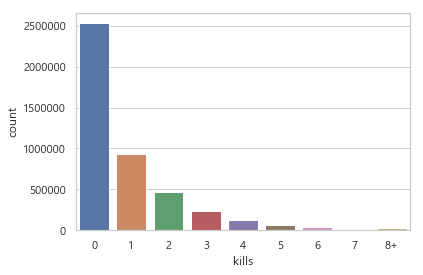

In [28]:
sns.countplot(data['kills'].astype('str').sort_values())

In [29]:
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'

TypeError: unorderable types: str() < int()

In [ ]:
print('a')